## This example use SVM classification and different kernels

Index <br>
1. Iris data  <br>
2. Using SVM  <br>
3. Gaussian kernel. <br>
4. Using Different Kernels. <br>
5. Naive Bayes
6. K-nearest neighboors
7. Face recognition
8. Decision Tree <br>
9. Ensemble

http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

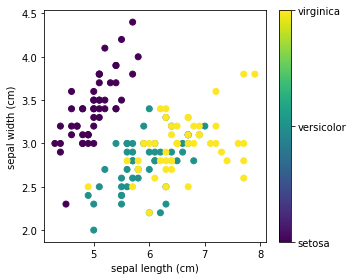

In [8]:
iris = datasets.load_iris()
x_index=0
y_index=1
formater=plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5,4))
plt.scatter(iris.data[:,x_index],iris.data[:,y_index],c=iris.target)
plt.colorbar(ticks=[0,1,2],format=formater)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

### Using SVM
#### Defining a custom kernel

In [9]:
import numpy as np
from sklearn import svm

In [42]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
C = 1.0  # SVM regularization parameter

#### Custom kernel - linear

In [15]:
def my_kernel(X,Y):
    return np.dot(X,Y.T)
classifier=svm.SVC(kernel=my_kernel,C=1.0,tol=0.001)

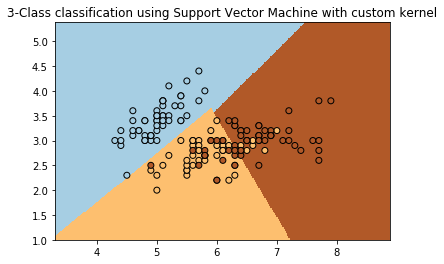

In [18]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
classifier.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

#### RBF user defined

In [44]:
def rbf_igor(va, vb):
    gamma = 10
    return exp(-gamma * linalg.norm(va - vb) ** 2)

#### Polynominal Kernel

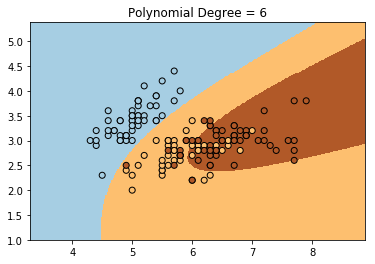

In [51]:
classifier3=svm.SVC(kernel="poly",degree=6)
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
classifier3.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = classifier3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z3 = Z3.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z3, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Polynomial Degree = 6')
plt.axis('tight')
plt.show()

### Tunning parameters
Aqui analisamos o efeito do parametro C

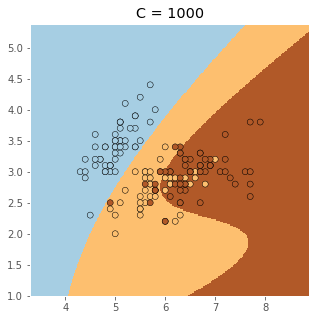

In [81]:
C10=svm.SVC(kernel="poly",degree=3,C=1000,tol=0.001)
C10.fit(X,y)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = C10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('C = 1000')
plt.axis('tight')
plt.show()

### Gaussian Kernel
https://mubaris.com/2017/10/14/svm-python/

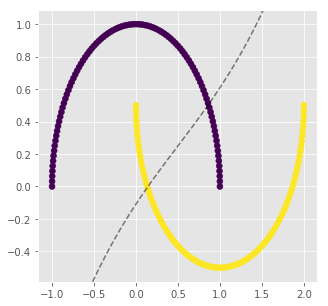

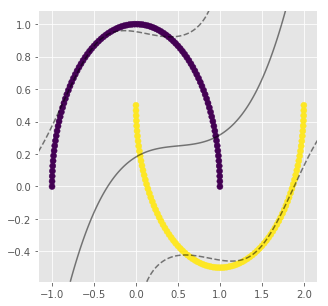

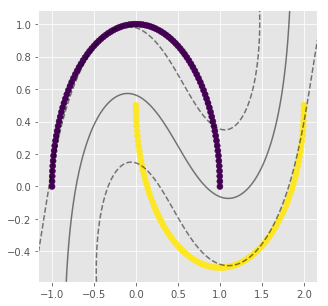

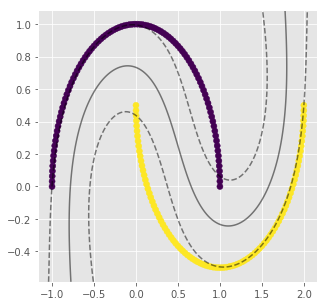

0.83
0.9
1.0
1.0


In [87]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

X, y = make_moons(n_samples=200)

# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.figure(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))

### Using different kernels

In [11]:
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

In [12]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

In [13]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

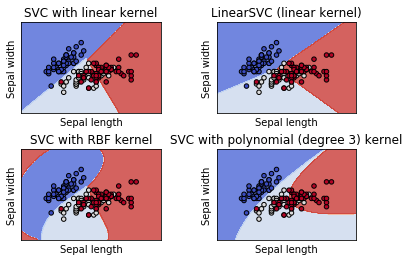

In [14]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Naive Bayes

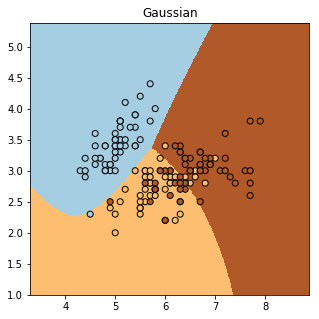

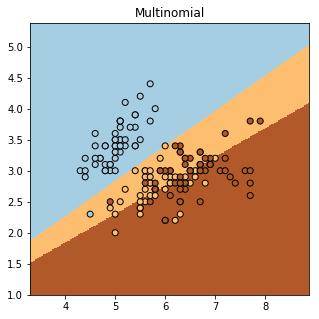

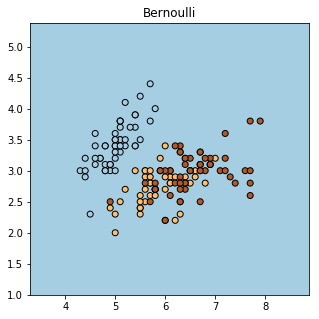

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# Gaussian
gnb=GaussianNB()
gnb.fit(X,y)
# Multinomial
mnb=MultinomialNB()
mnb.fit(X,y)
# Bernoulli
bnl=BernoulliNB()
bnl.fit(X,y)
###
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z1 = mnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = bnl.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
### plot
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Gaussian')
plt.axis('tight')
plt.show()
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z1, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Multinomial')
plt.axis('tight')
plt.show()
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z2, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Bernoulli')
plt.axis('tight')
plt.show()

## K-Nearest Neighbors

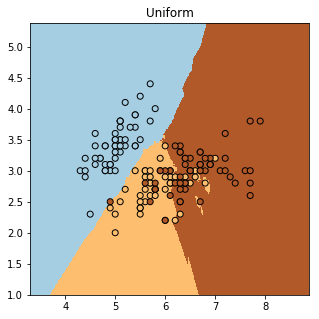

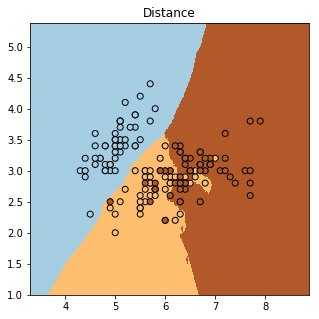

In [17]:
from sklearn import neighbors, datasets
n_neighbors=15
knbors1=neighbors.KNeighborsClassifier(n_neighbors,weights="uniform")
knbors1.fit(X,y)
knbors2=neighbors.KNeighborsClassifier(n_neighbors,weights="distance")
knbors2.fit(X,y)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
##
Z4 = knbors1.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)
Z5 = knbors2.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = Z5.reshape(xx.shape)
### plot
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z4, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Uniform')
plt.axis('tight')
plt.show()
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z5, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Distance')
plt.axis('tight')
plt.show()

### Example Face recognition using SVM
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html  <br>
http://scikit-learn.org/0.16/auto_examples/applications/face_recognition.html

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


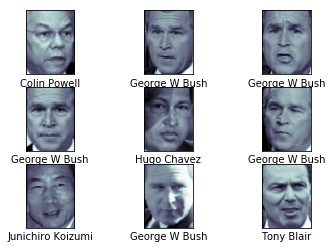

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [10]:
# using PCA before SVM
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
model

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [12]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whit

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20

CPU times: user 43.2 s, sys: 924 ms, total: 44.1 s
Wall time: 13.9 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [14]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

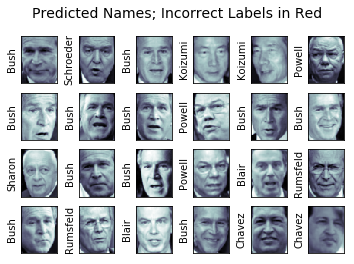

In [15]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [16]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.82      0.89       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.89      0.95      0.92        42

      avg / total       0.87      0.85      0.86       337



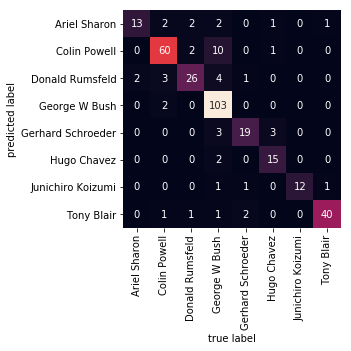

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Decision Tree

In [5]:
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

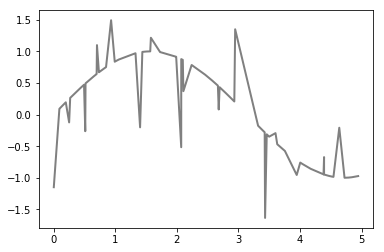

In [6]:
plt.plot(X, y,color="grey",label="data", linewidth=2)

In [38]:
# Let`s use different deph to decision tree
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=100)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

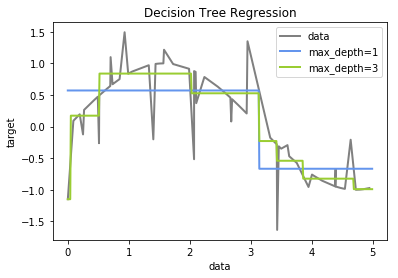

In [45]:
# Plot the results
plt.figure()
plt.plot(X, y,color="grey",label="data", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

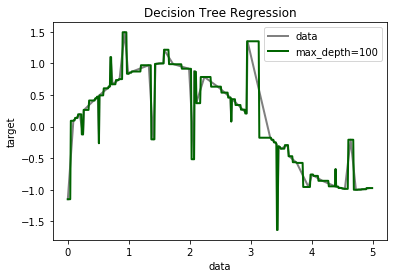

In [44]:
# Plot the results
plt.figure()
plt.plot(X, y,color="grey",label="data", linewidth=2)
plt.plot(X_test, y_4, color="darkgreen", label="max_depth=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
import collections

In [74]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

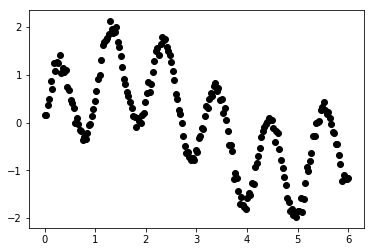

In [75]:
#plt.plot(y)
plt.scatter(X, y, c="k", label="training samples")

In [76]:
# Let`s use different deph to decision tree
dt1 = DecisionTreeRegressor(criterion="mse",max_depth=1)  #just 1 split
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=10)
dt4 = DecisionTreeRegressor(max_depth=100)
dt5 = DecisionTreeRegressor(criterion="mse")
### FIT
dt1.fit(X, y)
dt2.fit(X, y)
dt3.fit(X, y)
dt4.fit(X, y)
dt5.fit(X,y)
# Predict
dty_1 = dt1.predict(X)
dty_2 = dt2.predict(X)
dty_3 = dt3.predict(X)
dty_4 = dt4.predict(X)
dty_5 = dt5.predict(X)
## Score
s1=dt1.score(X,y)
s2=dt2.score(X,y)
s3=dt3.score(X,y)
s4=dt4.score(X,y)
s5=dt5.score(X,y)

In [77]:
print(s1,s2,s3,s4,s5)

0.493140333353 0.748532144492 0.999170187685 0.99999999994 0.99999999994


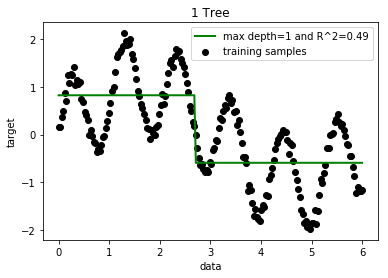

In [78]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, dty_1, c="g", label="max depth=1 and R^2=0.49", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("1 Tree")
plt.legend()
plt.show()

In [49]:
dt1.apply(X)   #Returns the index of the leaf that each sample is predicted as.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
dt1.get_params()

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [55]:
dt4.score(X,y)

0.99999999993987365

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y,order=(2,0,0))
model_fit=model.fit()

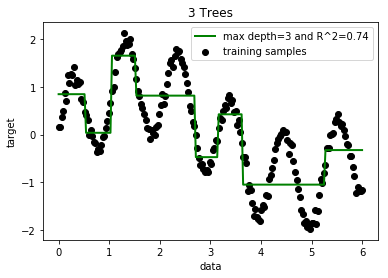

In [61]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, dty_2, c="g", label="max depth=3 and R^2=0.74", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("3 Trees")
plt.legend()
plt.show()

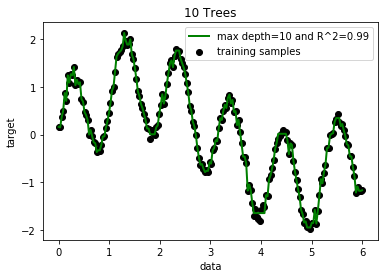

In [62]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, dty_3, c="g", label="max depth=10 and R^2=0.99", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("10 Trees")
plt.legend()
plt.show()

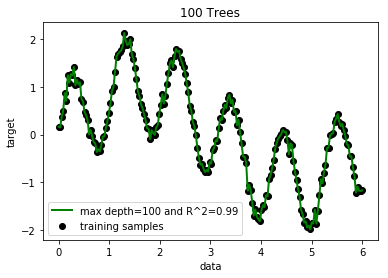

In [63]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, dty_4, c="g", label="max depth=100 and R^2=0.99", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("100 Trees")
plt.legend()
plt.show()

#### Applying AdaBoosting Regressor

In [103]:
# Fit regression model
ada1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=1, random_state=rng)
ada2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10, random_state=rng)
ada3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100, random_state=rng)
ada4 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [104]:
ada1.fit(X, y)
ada2.fit(X,y)
ada3.fit(X,y)
ada4.fit(X,y)
# Predict
aday_1 = ada1.predict(X)
aday_2 = ada2.predict(X)
aday_3 = ada3.predict(X)
aday_4 = ada4.predict(X)

In [109]:
# Scores in adaboosting regressors
score1=ada1.score(X,y)
score2=ada2.score(X,y)
score3=ada3.score(X,y)
score4=ada4.score(X,y)
print(score1,score2,score3,score4)

0.84735382723 0.941945612305 0.978943859626 0.981089849972


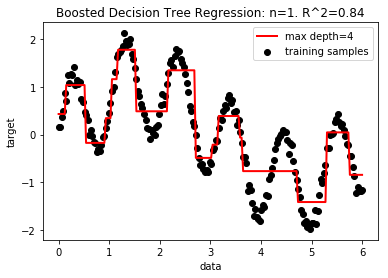

In [112]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, aday_1, c="r", label="max depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression: n=1. R^2=0.84")
plt.legend()
plt.show()

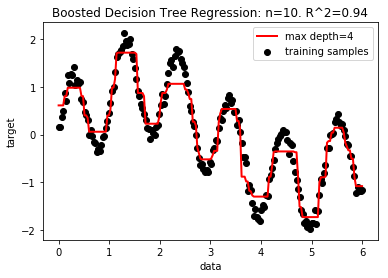

In [115]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, aday_2, c="r", label="max depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression: n=10. R^2=0.94")
plt.legend()
plt.show()

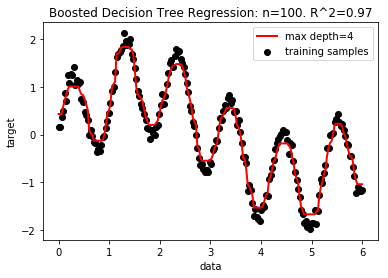

In [116]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, aday_3, c="r", label="max depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression: n=100. R^2=0.97")
plt.legend()
plt.show()

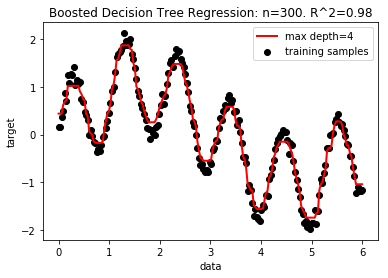

In [117]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, aday_4, c="r", label="max depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression: n=300. R^2=0.98")
plt.legend()
plt.show()

#### Applying Ensemble in decision tree = Random Forest

In [170]:
from sklearn.ensemble import RandomForestRegressor
# 10 decisions tree
# use 1 feature
rf = RandomForestRegressor(
    n_estimators=10,
    max_features=1,
    random_state=SEED
)

rf.fit(X, y)
final=rf.predict(X)
rf.score(X,y)

0.99657262595673879

In [57]:
import os
cwd = os.getcwd()
cwd

'/Users/igoracmorais/Documents/Python/Aplications'

In [1]:
import pandas as pd
gdp=pd.read_csv("GDPC1.csv",sep=",",dayfirst="TRUE")
gdp.head(4)

,Unnamed: 0,GDPC1
0,1/1/47,1934.471
1,NaN,NaN
2,NaN,NaN
3,4/1/47,1932.281


#### Using Decision tree to IRIS data

http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html

https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

# Bagging algorithm
http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)

In [ ]:
# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

In [ ]:
X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


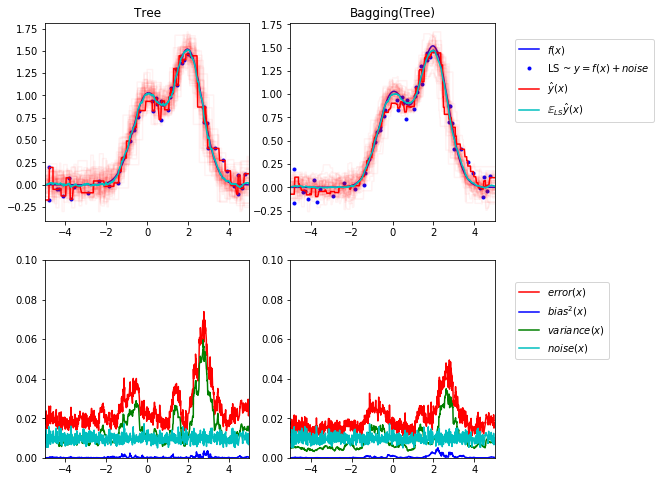

In [64]:
plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

## Ensemble
https://www.dataquest.io/blog/introduction-to-ensembles/

In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Import data
# Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

df = pd.read_csv('input.csv')

In [121]:
### Training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
def get_train_test(test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

xtrain, xtest, ytrain, ytest = get_train_test()

# A look at the data
print("\nExample data:")
df.head()


Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


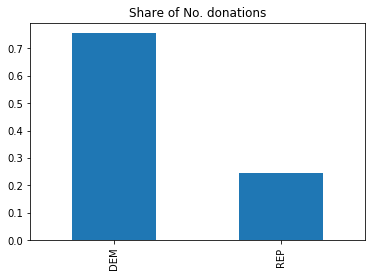

In [122]:
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind="bar", title="Share of No. donations")
plt.show()

In [155]:
drop = ["transaction_amt"]

xtrain_slim = xtrain.drop(drop, 1)
xtest_slim = xtest.drop(drop, 1)

In [166]:
# 1 level in decision tree
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.672


In [158]:
# 3 levels in decision tree
t3 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p3 = t3.predict_proba(xtest_slim)[:, 1]
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p3))

Decision tree ROC-AUC score: 0.740


In [167]:
# vamos combinar (ensemble) os dois modelos acima.
# o primeiro considera depth=1 e todas as features
# o segundo tem depth=3 e retira uma feature
# ao fim, fazemos a media dos dois modelos
p1 = t1.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.752


In [171]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=3,
    random_state=SEED
)

rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.844


In [172]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models

In [173]:
# uma funcao para aplicar a todos os modelos e fazer a previsao
def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [174]:
# a function to get the models scores
def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [175]:
models = get_models()
P = train_predict(models)
score_models(P, ytest)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.850
knn                       : 0.779
naive bayes               : 0.803
mlp-nn                    : 0.851
random forest             : 0.844
gbm                       : 0.878
logistic                  : 0.857
Done.



[MLENS] backend: threading


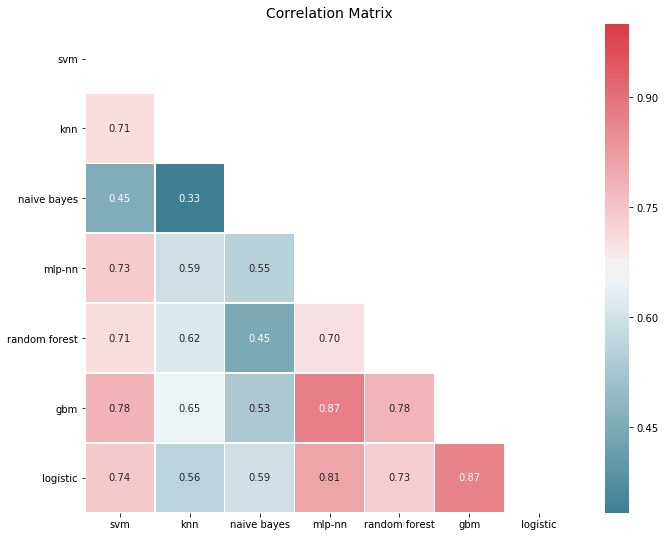

In [178]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

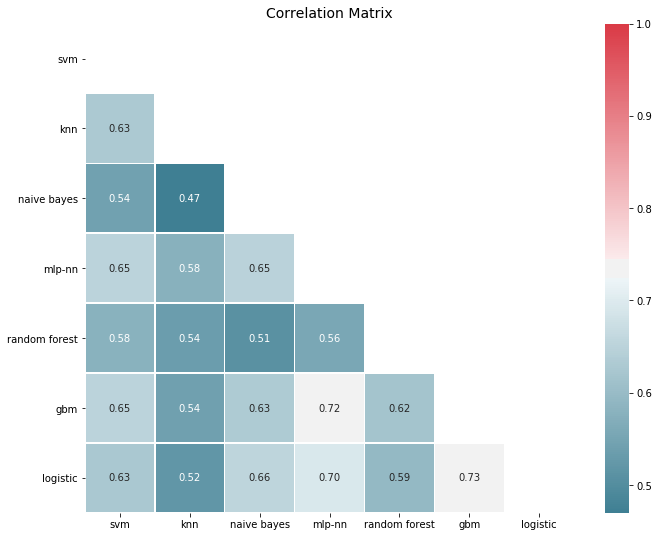

In [182]:
# olhando apenas a correlacao em uma das classes
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

In [183]:
# aplicando o ensemble como uma media dos modelos permite um resultado melhor
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.884


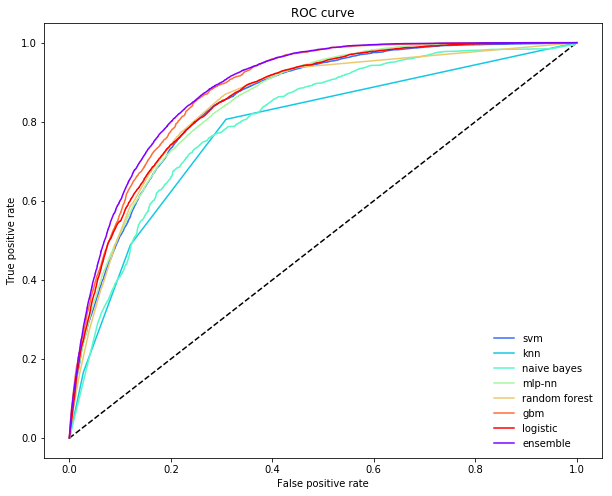

In [184]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), "ensemble")

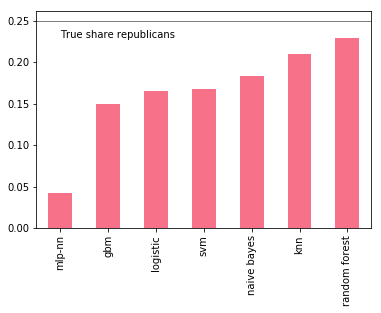

In [185]:
# veja que alguns modelos representam um valor de previsao das doacoes para o REP
# que é menor que o verdadeiro
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["DEM", "REP"]
p.loc["REP", :].sort_values().plot(kind="bar")
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.23, "True share republicans")
plt.show()

## Kernels using Astropy

<function matplotlib.pyplot.show>

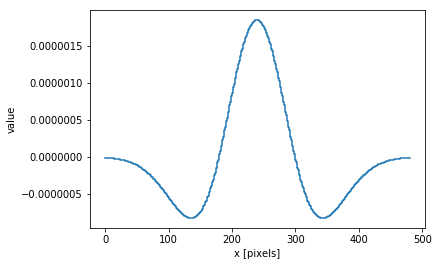

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.convolution import MexicanHat1DKernel
m1d=MexicanHat1DKernel(60)
plt.plot(m1d,drawstyle="steps")
plt.xlabel('x [pixels]')
plt.ylabel('value')
plt.show

1


<function matplotlib.pyplot.show>

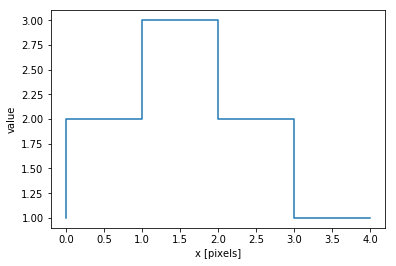

In [15]:
# Create a custom kernel using a data set
# one dimentional
from astropy.convolution.kernels import CustomKernel
import numpy as np
array=np.array([1,2,3,2,1])
kernel=CustomKernel(array)
print(kernel.dimension)
plt.plot(kernel,drawstyle="steps")
plt.xlabel('x [pixels]')
plt.ylabel('value')
plt.show

2


<function matplotlib.pyplot.show>

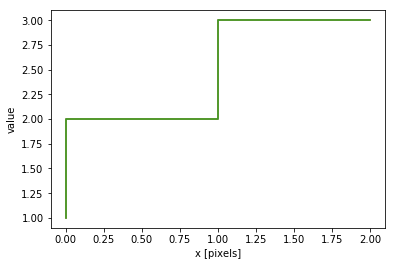

In [16]:
# two diementional
array2=np.array([[1,1,1],[2,2,2],[3,3,3]])
kernel2=CustomKernel(array2)
print(kernel2.dimension)
plt.plot(kernel2,drawstyle="steps")
plt.xlabel('x [pixels]')
plt.ylabel('value')
plt.show